# Solving TSP for benchmarking 

In [1]:
# Lazy importing 
import sys 
sys.path.append('..')

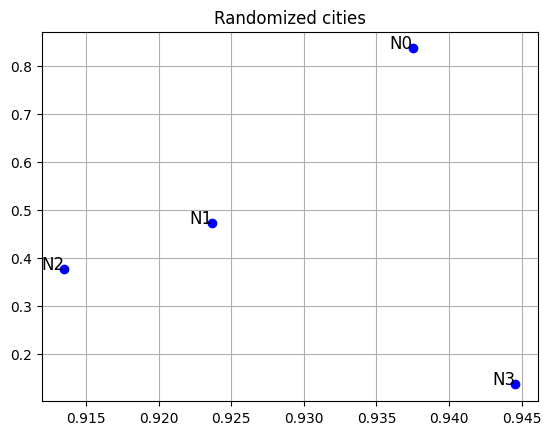

In [2]:
from utils import TSP 
from amplify import solve

# setting up the TSP problem 
tsp = TSP(4, initial_plot=True)

qp = tsp.qubo(format="amplify")
model = qp["model"]

## Brute Force

Tour:  (0, 1, 2, 3) Cost:  12


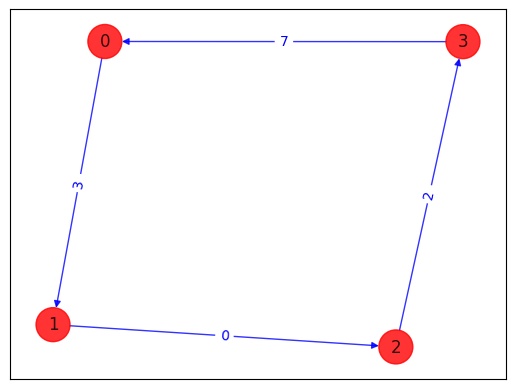

In [3]:
tour, cost = tsp.brute_force()
tsp.draw_tour(tour)

print("Tour: ", tour, "Cost: ", cost)

## Fixstars Amplify AE

In [4]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

print(resultF.best.objective)
print(tsp.interpret(resultF))



12.0
[1. 2. 3. 0.]


In [7]:
print(resultF.execution_time)

0:00:00.932049


## Gurobi

In [ ]:
from Utils.solvers import GetGurobiClient

clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)
print(resultG.best.objective)
print(tsp.interpret(resultG))

Time taken:  0.25377631187438965
12.0
[0. 2. 3. 1.]


In [8]:
print(resultG.execution_time)

0:00:00.121999


## D-Wave

In [6]:
from Utils.solvers import GetDWaveClient

clientDWave = GetDWaveClient()

result = solve(model, clientDWave)

print(result.best.objective)
print(tsp.interpret(result))

12.0
[2. 0. 1. 3.]


In [9]:
print(result.execution_time)

0:00:00.190519
